#### 1. Importing the necessary libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.Loading the dataset

In [201]:
df=pd.read_excel(r'C:\Users\Radhika\Downloads\online+retail\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###### Checking the various attributes of data like no. of rows and columns(shape), datatypes of the columns etc.,

In [108]:
df.shape

(541909, 8)

In [109]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [110]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [111]:
#to check the descriptive statistics of numerical variables
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


###### From the above explorations,
- We could infer that Quantity and Unitprice are having negative values. 
    This could possibly be the outliers and we can work on removing the outliers if needed. The fact that the outliers are present can also be known from the differences between Mean and Median values of those 2 numerical columns.
- We can also see that CustomerID is in type float64.
    That could be transformed to Int64 type.

#### 3.Dropping the missing values

The records with Customer IDs as NULL could be dropped by invoking dropna method, for the orders would not otherwise have been made.

In [203]:
df.dropna(inplace=True)

The above deleted records with NULL for Customer IDs are accountable for outliers too. As the negative values observed for Quantity becomes lesser(134 records) and Unitprice becomes zero.

But can still observe the negative values for Quantity and value 0.0 for Unit Price, using the foloowing code snippet (df["Quantity"]<0).value_counts() and (df1["UnitPrice"]<=0).value_counts()


#### 4. Detecting/Removing the outliers and Filling the missing values(Imputation)

In [204]:
#considering the records of quantity>0 in a newly created dataframe by executing the following operation
#since Quantity can never be negative and it only shows the Quantity data is inconsistent at this point
df1=df[~df["Quantity"]<0]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


<AxesSubplot:>

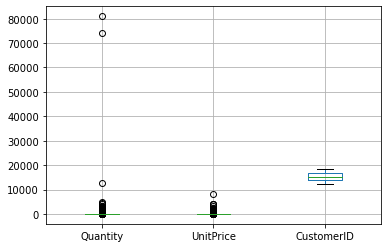

In [207]:
#Boxplots helps in easily visualizing the outliers in the data
df1.boxplot() 

We can see that the column values of Quantity has two outliers which makes the data to be highly spread. This could further be analysed and removed if needed.

In [185]:
#Filter the list price of the products and it's unit prices where the unitprices of the instances of zero 
non_zero_prices=df[df["UnitPrice"]!=0].drop_duplicates("Description")
#get the series with products as index and unitprice as the value 
price_map=non_zero_prices.set_index("Description")["UnitPrice"]
#using lambda apply, map the unitprices from the series to the products in our target dataframe 
df1["UnitPrice"]=df1.apply(lambda row: price_map.get(row["Description"],row["UnitPrice"]), axis=1)
(df1["UnitPrice"]==0).value_counts()

C:\Users\Radhika\AppData\Local\Temp\ipykernel_23468\359384531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["UnitPrice"]=df1.apply(lambda row: price_map.get(row["Description"],row["UnitPrice"]), axis=1)


False    397924
Name: UnitPrice, dtype: int64

In [187]:
#manually inserting the churned data for the Customers 
#1 for churned=yes with 70% values and 0 for churned=no with 30% values
df1['exited'] = np.random.choice([0,1],size=len(df1),p=[0.3,0.7])

C:\Users\Radhika\AppData\Local\Temp\ipykernel_23468\621149363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['exited'] = np.random.choice([0,1],size=len(df1),p=[0.3,0.7])


Text(0.5, 1.0, 'Count of customers by churned(1)/not churned(0)')

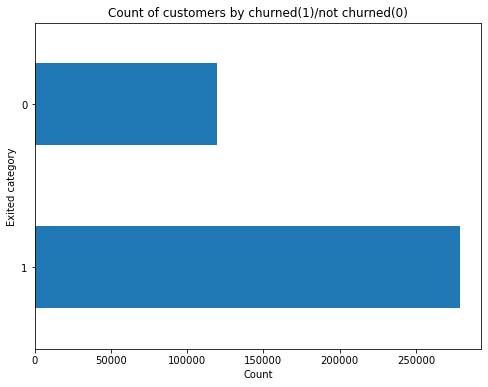

In [188]:
df1['exited'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('Count')
plt.ylabel('Exited category')
plt.title('Count of customers by churned(1)/not churned(0)')

#### 3. Data Cleaning

In [189]:
#creatina a copy of the base data before getting into cleaning phase
data=df1.copy()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,exited
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [190]:
#Customer ID should be an integer value and below step is performing the same using astype method
data.CustomerID=data.CustomerID.astype(int)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,exited
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


#### 4. Data Binning
To bin the sales transactions by seasons,and to analyse which seasons have performed good amount of sales.

In [191]:
#filtering the sales for year=2011, considering the sales of one year for analysis purposes
sales_2011=data[data["InvoiceDate"].dt.year==2011]
#ensuring the sales are present for 2011 only, in a newly created dataframe
sales_2011[~sales_2011["InvoiceDate"].dt.year==2011]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,exited


In [193]:
#Extract Month IDs and Year IDs from Invoice Date column
sales_2011["InvoiceYear"]=sales_2011["InvoiceDate"].dt.year
sales_2011["InvoiceMonth"]=sales_2011["InvoiceDate"].dt.month

C:\Users\Radhika\AppData\Local\Temp\ipykernel_23468\1474331184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2011["InvoiceYear"]=sales_2011["InvoiceDate"].dt.year
C:\Users\Radhika\AppData\Local\Temp\ipykernel_23468\1474331184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2011["InvoiceMonth"]=sales_2011["InvoiceDate"].dt.month


In [194]:
labels=["{0}-{1}".format(i,i+2) for i in range(1,13,3)]
labels

['1-3', '4-6', '7-9', '10-12']

C:\Users\Radhika\AppData\Local\Temp\ipykernel_23468\2331950360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2011["Month_group"]=pd.cut(sales_2011["InvoiceMonth"],range(1,14,3),right=False,labels=labels)


<AxesSubplot:>

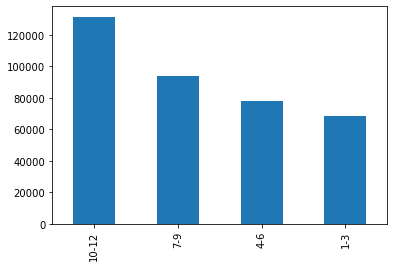

In [195]:
sales_2011["Month_group"]=pd.cut(sales_2011["InvoiceMonth"],range(1,14,3),right=False,labels=labels)
sales_2011["Month_group"].value_counts().plot(kind="bar")

Can infer that, more than any seasons/month groups, months 10-12 contributed more to the sales.
We can now perform the exercise of which products have been sold the least in which month, decide and inform the business about the underperformed products. For which more discounts could be given.

In [196]:
sales_2011["sales_amount"]=sales_2011["Quantity"]*sales_2011["UnitPrice"]

C:\Users\Radhika\AppData\Local\Temp\ipykernel_23468\3976270736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2011["sales_amount"]=sales_2011["Quantity"]*sales_2011["UnitPrice"]


In [197]:
sales_by_year_month_product= sales_2011.groupby(['InvoiceYear', 'InvoiceMonth', 'Description'])['sales_amount'].sum().reset_index()
sales_by_year_month_product['rank']=sales_by_year_month_product.groupby(['InvoiceYear', 'InvoiceMonth'])['sales_amount'].rank(ascending=True)

# Filter bottom 3 products per month-year
bottom_3 = sales_by_year_month_product[sales_by_year_month_product['rank'] <= 3].sort_values(['InvoiceYear', 'InvoiceMonth', 'rank'])
bottom_3

,InvoiceYear,InvoiceMonth,Description,sales_amount,rank
2779,2011,2,FELT FARM ANIMAL HEN,0.420,2.0
3192,2011,2,MAGIC DRAWING SLATE BAKE A CAKE,0.420,2.0
3253,2011,2,MINI JIGSAW PURDEY,0.420,2.0
4456,2011,3,BLACK FEATHER CHRISTMAS DECORATION,0.190,1.0
7799,2011,4,PADS TO MATCH ALL CUSHIONS,0.001,1.0
9902,2011,5,MINI JIGSAW GO TO THE FAIR,0.420,1.5
9904,2011,5,MINI JIGSAW PURDEY,0.420,1.5
11087,2011,6,ASSORTED COLOUR SUCTION CUP HOOK,0.190,1.0
11846,2011,6,GOLD FABRIC MIRROR,0.390,2.0
12904,2011,6,SILICON STAR BULB BLUE,0.420,3.0


We can see that products such as MINI JIGSAW, RETRO PILL BOX KEY, ASSORTED COLOUR SUCTION are the most common ones that have low sales and could be considered for giving discounts.

In [199]:
sales_2011.describe()

,Quantity,UnitPrice,CustomerID,exited,InvoiceYear,InvoiceMonth,sales_amount
count,371764.000000,371764.000000,371764.000000,371764.000000,371764.0,371764.000000,371764.000000
mean,13.098138,2.938928,15277.794830,0.700057,2011.0,7.303803,24.210206
std,186.261721,5.022264,1710.030407,0.458233,0.0,3.323274,321.813590
min,1.000000,0.001000,12346.000000,0.000000,2011.0,1.000000,0.001000
25%,2.000000,1.250000,13941.000000,0.000000,2011.0,5.000000,4.950000
50%,6.000000,1.950000,15125.000000,1.000000,2011.0,8.000000,12.480000
75%,12.000000,3.750000,16775.000000,1.000000,2011.0,10.000000,19.800000
max,80995.000000,649.500000,18287.000000,1.000000,2011.0,12.000000,168469.600000
